In [1]:
#ORIGINAL CODE OBTAINED FROM 
#https://www.kaggle.com/code/srijanmandal/forest-fire-detection-using-cnn
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("Training and Validation/",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory("Testing/",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 1832 images belonging to 2 classes.
Found 70 images belonging to 2 classes.


In [3]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

In [4]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [6]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [7]:
r = model.fit(train_dataset, epochs = 10, validation_data = test_dataset)

Epoch 1/10
58/58 [==============================] - 5s 35ms/step - loss: 0.2847 - accuracy: 0.8783 - val_loss: 0.3980 - val_accuracy: 0.8571
Epoch 2/10
58/58 [==============================] - 2s 29ms/step - loss: 0.1525 - accuracy: 0.9503 - val_loss: 0.4157 - val_accuracy: 0.8429
Epoch 3/10
58/58 [==============================] - 2s 27ms/step - loss: 0.1625 - accuracy: 0.9487 - val_loss: 0.3778 - val_accuracy: 0.8000
Epoch 4/10
58/58 [==============================] - 2s 28ms/step - loss: 0.1188 - accuracy: 0.9629 - val_loss: 0.3155 - val_accuracy: 0.8571
Epoch 5/10
58/58 [==============================] - 2s 28ms/step - loss: 0.0915 - accuracy: 0.9722 - val_loss: 0.1580 - val_accuracy: 0.9143
Epoch 6/10
58/58 [==============================] - 2s 28ms/step - loss: 0.0718 - accuracy: 0.9782 - val_loss: 0.2108 - val_accuracy: 0.9286
Epoch 7/10
58/58 [==============================] - 2s 27ms/step - loss: 0.0754 - accuracy: 0.9782 - val_loss: 0.2288 - val_accuracy: 0.9000
Epoch 8/10
58

In [8]:
#Predicting on Test Dataset
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

In [9]:
predictions

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [10]:
print(len(predictions))

70


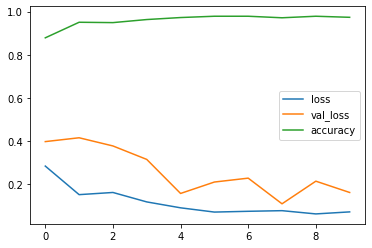

In [11]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.plot(r.history['accuracy'], label='accuracy')
plt.legend()

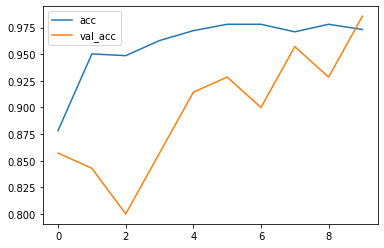

In [12]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [13]:
#Making a function to see any image from dataset with predicted label
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("No Fire",fontsize=30)
    elif val == 0:
        plt.xlabel("Fire",fontsize=30)

[[0.]]


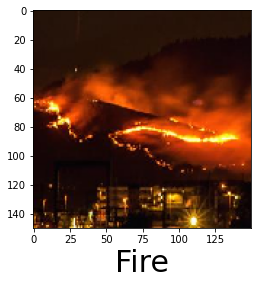

In [14]:
predictImage("Testing/fire/abc182.jpg")

[[0.]]


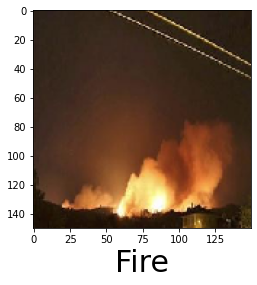

In [15]:
predictImage('Testing/fire/abc190.jpg')

[[1.]]


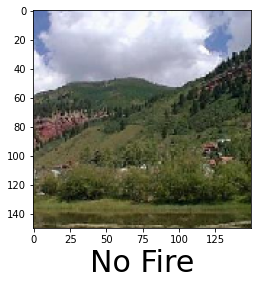

In [16]:
predictImage('Testing/nofire/abc346.jpg')

[[1.]]


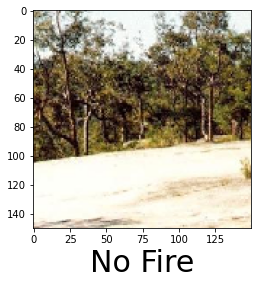

In [17]:
predictImage('Testing/nofire/abc361.jpg')

[[0.]]


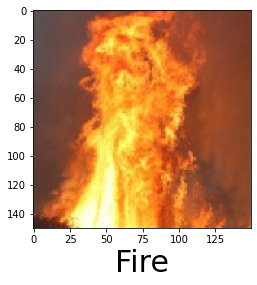

In [18]:
predictImage('Training and Validation/fire/abc011.jpg')

[[0.]]


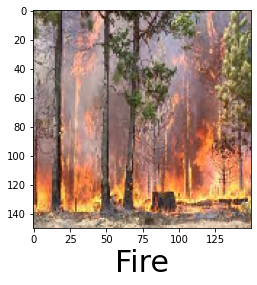

In [19]:
predictImage('Testing/fire/wazir.jpg')

[[1.]]


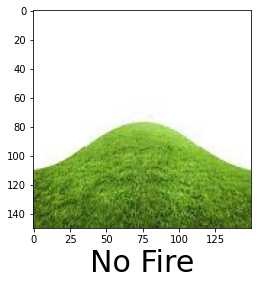

In [20]:
predictImage('Testing/nofire/wazir.jpg')